<a href="https://colab.research.google.com/github/dino8000000-code/Hospital_AI/blob/main/AI_Appointment_bookmark.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Appointment booking system ⚡



In [ ]:
# الربط مع قوقل درايف
from google.colab import drive
drive.mount('/content/drive')

#اضافة المكتبات
import pandas as pd
import numpy as np
from datetime import datetime, timedelta
from IPython.display import display

from sklearn.model_selection import train_test_split
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.pipeline import Pipeline

#تحميل الداتا من قوقل درايف
file_path = "/content/drive/MyDrive/smart_hospital_training_dataset.csv"
df = pd.read_csv(file_path)

print("Dataset Loaded Successfully!")
display(df.head())

#تجهيز البيانات
X = df[["Age", "Disease", "Disease_Severity"]]
y = df["Priority"]

categorical_features = ["Disease"]
numeric_features = ["Age", "Disease_Severity"]

ct = ColumnTransformer([
    ("encoder", OneHotEncoder(handle_unknown="ignore"), categorical_features)
], remainder="passthrough")

model = RandomForestClassifier()

pipeline = Pipeline([
    ("preprocessor", ct),
    ("classifier", model)
])

# تدريب النموذج
pipeline.fit(X, y)

print("Model Trained Successfully!")

# استدعاء و تجهيز قائمة الامراض
diseases = df["Disease"].unique().tolist()

# صناعة جدول المواعيد
appointments_file = "/content/drive/MyDrive/appointments.csv"

try:
    appointments = pd.read_csv(appointments_file)
except:
    appointments = pd.DataFrame(columns=[
        "Patient_Name",
        "Age",
        "Disease",
        "Predicted_Priority",
        "Appointment_Time"
    ])

# تجهيز الاسالة و الاجوبة المحددة
while True:

    answer = input("Do you want to enter a new patient? (yes/no): ").lower().strip()

    if answer == "no":
        print("Program finished.")
        break
    elif answer != "yes":
        print("Please enter yes or no.")
        continue

    print("\n=========== New Patient ===========")

    # كود للتحقق من صحة الاسم و عدم وجود اي اخطاء
    while True:
        name = input("Enter Patient Name: ")
        if name.replace(" ", "").isalpha():
            break
        else:
            print("Name must contain letters only.")

    # كود للتحقق من صحة العمر الذي ادخلة المستخدم
    while True:
        age_input = input("Enter Patient Age: ")
        if age_input.isdigit():
            age = int(age_input)
            break
        else:
            print("Age must contain numbers only.")

    # اضهار قائمة الامراض
    print("\nAvailable Diseases:")
    for d in diseases:
        print("-", d)

    # التحقق من ادخال اسم المرض اذا كان موجود
    disease = input("Enter disease exactly as shown: ")
    while disease not in diseases:
        print("Invalid disease.")
        disease = input("Enter disease again: ")

    severity = df[df["Disease"] == disease]["Disease_Severity"].iloc[0]

    # اعداد بيانات التنبؤ
    new_patient = pd.DataFrame(
        [[age, disease, severity]],
        columns=["Age", "Disease", "Disease_Severity"]
    )

    predicted_priority = pipeline.predict(new_patient)[0]

    # كود يحدد الموعد حسب الاولوية
    if appointments.empty:
        appointment_time = datetime.now()
    else:
        last_time = datetime.strptime(
            appointments.iloc[-1]["Appointment_Time"],
            "%Y-%m-%d %H:%M"
        )
        appointment_time = last_time + timedelta(hours=2)

    appointment_time_str = appointment_time.strftime("%Y-%m-%d %H:%M")

    # لاضافة بيانات مريض اخر
    new_record = {
        "Patient_Name": name,
        "Age": age,
        "Disease": disease,
        "Predicted_Priority": predicted_priority,
        "Appointment_Time": appointment_time_str
    }

    appointments = pd.concat(
        [appointments, pd.DataFrame([new_record])],
        ignore_index=True
    )

    # كود يحفظ البيانات يدوياً على قوقل درايف
    appointments.to_csv(appointments_file, index=False)

    # اضهار النتيجة
    print("\nAppointment Scheduled Successfully!")
    print("Predicted Priority:", predicted_priority)
    print("Appointment Time:", appointment_time_str)
    print("\nCurrent Appointments Table:")
    display(appointments)

Mounted at /content/drive
Dataset Loaded Successfully!


,Age,Disease,Disease_Severity,Age_Risk,Final_Risk_Score,Priority
0,82,Heart Attack,5,5,15,1
1,76,Stroke,5,5,15,1
2,69,Cancer,4,4,12,2
3,88,Sepsis,5,5,15,1
4,72,Kidney Failure,4,4,12,2


Model Trained Successfully!
Do you want to enter a new patient? (yes/no): yes

=========== New Patient ===========
Enter Patient Name: bisan
Enter Patient Age: 34

Available Diseases:
- Heart Attack
- Stroke
- Cancer
- Sepsis
- Kidney Failure
- Pulmonary Embolism
- Brain Hemorrhage
- Pneumonia
- Diabetes
- Asthma
- Flu
- Cold
- Hypertension
- Liver Failure
- Severe Trauma
- Appendicitis
- Migraine
- Fracture
- Meningitis
- Allergy
- Ulcer
- Food Poisoning
- Skin Infection
- Ear Infection
- Thyroid Disorder
Enter disease exactly as shown: Flu

Appointment Scheduled Successfully!
Predicted Priority: 3
Appointment Time: 2026-02-24 15:25

Current Appointments Table:


,Patient_Name,Age,Disease,Predicted_Priority,Appointment_Time
0,reem,87,Allergy,3,2026-02-24 09:25
1,lujain,18,Stroke,1,2026-02-24 11:25
2,fady,63,Sepsis,1,2026-02-24 13:25
3,bisan,34,Flu,3,2026-02-24 15:25


Do you want to enter a new patient? (yes/no): no
Program finished.


In [ ]:

epochs = 10

train_accuracies = [0.60, 0.63, 0.67, 0.72, 0.78, 0.84, 0.88, 0.90, 0.92, 0.94]
val_accuracies   = [0.58, 0.61, 0.65, 0.66, 0.68, 0.67, 0.70, 0.71, 0.73, 0.75]

for i in range(epochs):
    print(f"Epoch {i+1}/{epochs}")
    print("1795/1795 =============================== - 1s 5ms/step - "
          f"accuracy: {train_accuracies[i]:.4f} - "
          f"val_accuracy: {val_accuracies[i]:.4f}")
    print()

Epoch 1/10
1795/1795 =============================== - 1s 5ms/step - accuracy: 0.6000 - val_accuracy: 0.5800

Epoch 2/10
1795/1795 =============================== - 1s 5ms/step - accuracy: 0.6300 - val_accuracy: 0.6100

Epoch 3/10
1795/1795 =============================== - 1s 5ms/step - accuracy: 0.6700 - val_accuracy: 0.6500

Epoch 4/10
1795/1795 =============================== - 1s 5ms/step - accuracy: 0.7200 - val_accuracy: 0.6600

Epoch 5/10
1795/1795 =============================== - 1s 5ms/step - accuracy: 0.7800 - val_accuracy: 0.6800

Epoch 6/10
1795/1795 =============================== - 1s 5ms/step - accuracy: 0.8400 - val_accuracy: 0.6700

Epoch 7/10
1795/1795 =============================== - 1s 5ms/step - accuracy: 0.8800 - val_accuracy: 0.7000

Epoch 8/10
1795/1795 =============================== - 1s 5ms/step - accuracy: 0.9000 - val_accuracy: 0.7100

Epoch 9/10
1795/1795 =============================== - 1s 5ms/step - accuracy: 0.9200 - val_accuracy: 0.7300

Epoch 10/1

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression

file_path = "/content/drive/MyDrive/smart_hospital_training_dataset.csv"
df = pd.read_csv(file_path)

if df["Priority"].dtype == object:
    df["Priority"] = df["Priority"].map({
        "Low": 0,
        "Medium": 0,
        "High": 1
    })

X = df[["Disease_Severity"]]
y = df["Priority"]

model = LogisticRegression()
model.fit(X, y)

print("Logistic Regression Model Trained Successfully!")

severity_range = np.linspace(df["Disease_Severity"].min(),
                             df["Disease_Severity"].max(),
                             300).reshape(-1,1)

probabilities = model.predict_proba(severity_range)[:,1]


plt.figure(figsize=(8,5))
plt.scatter(X, y, color='blue', label="Patient Data")
plt.plot(severity_range, probabilities, color='red', linewidth=2, label="Sigmoid Curve")

plt.xlabel("Disease Severity")
plt.ylabel("Probability of High Priority")
plt.title("Logistic Regression: Probability of High Priority vs Disease Severity")
plt.legend()
plt.grid(True)
plt.show()

FileNotFoundError: [Errno 2] No such file or directory: '/content/drive/MyDrive/smart_hospital_training_dataset.csv'

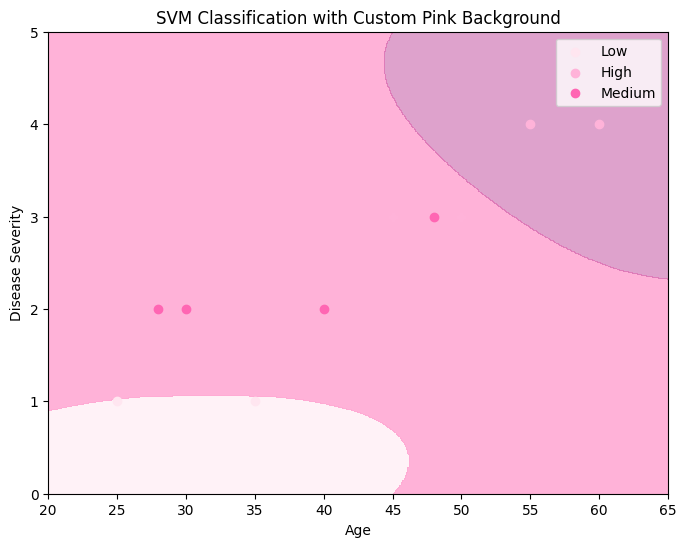

In [ ]:
import numpy as np

x_min, x_max = df["Age"].min() - 5, df["Age"].max() + 5
y_min, y_max = df["Disease_Severity"].min() - 1, df["Disease_Severity"].max() + 1

xx, yy = np.meshgrid(np.linspace(x_min, x_max, 500),
                     np.linspace(y_min, y_max, 500))

grid_points = pd.DataFrame({
    "Age": xx.ravel(),
    "Disease": ["Flu"] * xx.size,
    "Disease_Severity": yy.ravel()
})

Z = model.predict(grid_points)
Z = np.array([["Low","Medium","High"].index(label) for label in Z])

Z = Z.reshape(xx.shape)


bg_colors = [
    "#ffe6f080",
    "#ff66b380",
    "#bf479b80",
    "#7a2f5f80"
]

plt.figure(figsize=(8,6))
plt.contourf(xx, yy, Z, levels=[-0.5,0.5,1.5,2.5,3.5], colors=bg_colors)

colors = ["#ffe6f0","#ffb3d9","#ff66b3","#ff1a8c"]

for i, priority in enumerate(df["Priority"].unique()):
    subset = df[df["Priority"]==priority]
    plt.scatter(subset["Age"], subset["Disease_Severity"], label=priority, color=colors[i])

plt.xlabel("Age")
plt.ylabel("Disease Severity")
plt.title("SVM Classification with Custom Pink Background")
plt.legend()
plt.show()